In [17]:
import numpy as np
import matplotlib.pyplot as plt
from glob2 import glob
import cv2 as cv

In [6]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.
C:\Users\mekar\anoconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mekar\anoconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mekar\anoconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mekar\anoconda\envs\tf\lib\site-packages\tensorflo

In [18]:
print(os.listdir("chest_xray/"))
SIZE=256

train_images=[]
train_labels=[]
for directory_path in glob("chest_xray/train/*"):
    label=directory_path.split("\\")[-1]
    print(label)
    for img_path in glob(os.path.join(directory_path,"*")):
        print(img_path)
        img=cv.imread(img_path,cv.IMREAD_COLOR)
        img=cv.resize(img,(SIZE,SIZE))
        train_images.append(img)
        train_labels.append(label)

['test', 'train']
trncovid
chest_xray/train\trncovid\000001-1.jpg
chest_xray/train\trncovid\000001-1.png
chest_xray/train\trncovid\000001-2.jpg
chest_xray/train\trncovid\000001-2.png
chest_xray/train\trncovid\000001-3.jpg
chest_xray/train\trncovid\000001-3.png
chest_xray/train\trncovid\000001-4.jpg
chest_xray/train\trncovid\000001-4.png
chest_xray/train\trncovid\000001-5.png
chest_xray/train\trncovid\000001-6.jpg
chest_xray/train\trncovid\000001-6.png
chest_xray/train\trncovid\000001-7.jpg
chest_xray/train\trncovid\000001-8.jpg
chest_xray/train\trncovid\000001-9-a.jpg
chest_xray/train\trncovid\000001-9-b.jpg
chest_xray/train\trncovid\000001-9.jpg
chest_xray/train\trncovid\000001.jpg
chest_xray/train\trncovid\000001.png
chest_xray/train\trncovid\0a6c60063b4bae4de001caaba306d1_jumbo.jpeg
chest_xray/train\trncovid\0a7faa2a.jpg
chest_xray/train\trncovid\0ac7580d.jpg
chest_xray/train\trncovid\0b1cb8905fd8839a001d7a707f0c3f_jumbo.jpg
chest_xray/train\trncovid\0cd9fcb6.jpg
chest_xray/train\tr

chest_xray/train\trncovid\covid-19-pneumonia-progression-and-regression-day24.jpg
chest_xray/train\trncovid\covid-19-pneumonia-progression-and-regression-day28.jpg
chest_xray/train\trncovid\covid-19-pneumonia-progression-and-regression-day6.jpg
chest_xray/train\trncovid\covid-19-pneumonia-rapidly-progressive-12-hours.jpg
chest_xray/train\trncovid\covid-19-pneumonia-rapidly-progressive-3-days.jpg
chest_xray/train\trncovid\covid-19-pneumonia-rapidly-progressive-admission.jpg
chest_xray/train\trncovid\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg
chest_xray/train\trncovid\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-1.jpg
chest_xray/train\trncovid\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-2.jpg
chest_xray/train\trncovid\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-3.jpg
chest_xray/train\trncovid\d009d61f.jpg
chest_xray/train\trncovid\d2af569b.jpg
chest_xray/train

chest_xray/train\trncovid\post-intubuation-pneumomediastium-and-pneumothorax-background-covid-19-pneumonia-day6-1.jpg
chest_xray/train\trncovid\post-intubuation-pneumomediastium-and-pneumothorax-background-covid-19-pneumonia-day6-2.jpg
chest_xray/train\trncovid\post-intubuation-pneumomediastium-and-pneumothorax-background-covid-19-pneumonia-day7.jpg
chest_xray/train\trncovid\radiol.2020200274.fig3d.png
chest_xray/train\trncovid\radiol.2020200490.fig3.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig2a.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig2b.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig2c.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig2d.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig3a.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig3b.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig3c.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig3d.jpeg
chest_xray/train\trncovid\radiol.2020201160.fig6b.jpeg
chest_xray/train\trncovid\right-upper-lobe-pn

chest_xray/train\trnnormal\IM-0656-0001.jpeg
chest_xray/train\trnnormal\IM-0657-0001.jpeg
chest_xray/train\trnnormal\IM-0658-0001.jpeg
chest_xray/train\trnnormal\IM-0659-0001.jpeg
chest_xray/train\trnnormal\IM-0660-0001-0001.jpeg
chest_xray/train\trnnormal\IM-0660-0001-0002.jpeg
chest_xray/train\trnnormal\IM-0660-0001.jpeg
chest_xray/train\trnnormal\IM-0661-0001.jpeg
chest_xray/train\trnnormal\IM-0662-0001.jpeg
chest_xray/train\trnnormal\IM-0663-0001.jpeg
chest_xray/train\trnnormal\IM-0664-0001.jpeg
chest_xray/train\trnnormal\IM-0665-0001.jpeg
chest_xray/train\trnnormal\IM-0666-0001-0001.jpeg
chest_xray/train\trnnormal\IM-0666-0001-0002.jpeg
chest_xray/train\trnnormal\IM-0666-0001.jpeg
chest_xray/train\trnnormal\IM-0667-0001.jpeg
chest_xray/train\trnnormal\IM-0668-0001.jpeg
chest_xray/train\trnnormal\IM-0669-0001.jpeg
chest_xray/train\trnnormal\IM-0670-0001.jpeg
chest_xray/train\trnnormal\IM-0671-0001.jpeg
chest_xray/train\trnnormal\IM-0672-0001.jpeg
chest_xray/train\trnnormal\IM-0673-

chest_xray/train\trnnormal\NORMAL2-IM-1020-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1022-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1023-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1024-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1025-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1026-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1027-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1028-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1030-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1033-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1035-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1037-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1038-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1039-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1040-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1041-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1043-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1044-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1045-000

chest_xray/train\trnnormal\NORMAL2-IM-1219-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1220-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1221-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1222-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1223-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1224-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1225-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1226-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1227-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1228-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1231-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1232-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1234-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1236-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1237-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1240-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1241-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1242-0001.jpeg
chest_xray/train\trnnormal\NORMAL2-IM-1243-000

chest_xray/train\trnpneumonia\person108_virus_201.jpeg
chest_xray/train\trnpneumonia\person109_virus_203.jpeg
chest_xray/train\trnpneumonia\person10_bacteria_43.jpeg
chest_xray/train\trnpneumonia\person110_virus_205.jpeg
chest_xray/train\trnpneumonia\person110_virus_206.jpeg
chest_xray/train\trnpneumonia\person110_virus_207.jpeg
chest_xray/train\trnpneumonia\person110_virus_208.jpeg
chest_xray/train\trnpneumonia\person111_virus_209.jpeg
chest_xray/train\trnpneumonia\person111_virus_210.jpeg
chest_xray/train\trnpneumonia\person111_virus_212.jpeg
chest_xray/train\trnpneumonia\person112_virus_213.jpeg
chest_xray/train\trnpneumonia\person113_virus_215.jpeg
chest_xray/train\trnpneumonia\person113_virus_216.jpeg
chest_xray/train\trnpneumonia\person114_virus_217.jpeg
chest_xray/train\trnpneumonia\person115_virus_218.jpeg
chest_xray/train\trnpneumonia\person115_virus_219.jpeg
chest_xray/train\trnpneumonia\person116_virus_221.jpeg
chest_xray/train\trnpneumonia\person117_virus_223.jpeg
chest_xra

chest_xray/train\trnpneumonia\person255_bacteria_1160.jpeg
chest_xray/train\trnpneumonia\person255_bacteria_1161.jpeg
chest_xray/train\trnpneumonia\person255_bacteria_1162.jpeg
chest_xray/train\trnpneumonia\person255_bacteria_1165.jpeg
chest_xray/train\trnpneumonia\person255_bacteria_1175.jpeg
chest_xray/train\trnpneumonia\person255_bacteria_1182.jpeg
chest_xray/train\trnpneumonia\person255_bacteria_1188.jpeg
chest_xray/train\trnpneumonia\person255_virus_531.jpeg
chest_xray/train\trnpneumonia\person256_bacteria_1189.jpeg
chest_xray/train\trnpneumonia\person256_virus_537.jpeg
chest_xray/train\trnpneumonia\person257_bacteria_1191.jpeg
chest_xray/train\trnpneumonia\person257_bacteria_1193.jpeg
chest_xray/train\trnpneumonia\person257_bacteria_1194.jpeg
chest_xray/train\trnpneumonia\person257_bacteria_1195.jpeg
chest_xray/train\trnpneumonia\person257_bacteria_1196.jpeg
chest_xray/train\trnpneumonia\person257_bacteria_1197.jpeg
chest_xray/train\trnpneumonia\person257_bacteria_1199.jpeg
chest

chest_xray/train\trnpneumonia\person37_bacteria_189.jpeg
chest_xray/train\trnpneumonia\person38_bacteria_190.jpeg
chest_xray/train\trnpneumonia\person38_bacteria_191.jpeg
chest_xray/train\trnpneumonia\person38_bacteria_192.jpeg
chest_xray/train\trnpneumonia\person38_bacteria_193.jpeg
chest_xray/train\trnpneumonia\person38_bacteria_194.jpeg
chest_xray/train\trnpneumonia\person38_bacteria_195.jpeg
chest_xray/train\trnpneumonia\person38_bacteria_196.jpeg
chest_xray/train\trnpneumonia\person39_bacteria_198.jpeg
chest_xray/train\trnpneumonia\person39_bacteria_200.jpeg
chest_xray/train\trnpneumonia\person3_bacteria_10.jpeg
chest_xray/train\trnpneumonia\person3_bacteria_11.jpeg
chest_xray/train\trnpneumonia\person3_bacteria_12.jpeg
chest_xray/train\trnpneumonia\person3_bacteria_13.jpeg
chest_xray/train\trnpneumonia\person40_bacteria_202.jpeg
chest_xray/train\trnpneumonia\person40_bacteria_203.jpeg
chest_xray/train\trnpneumonia\person40_bacteria_204.jpeg
chest_xray/train\trnpneumonia\person40_

chest_xray/train\trnpneumonia\person72_bacteria_353.jpeg
chest_xray/train\trnpneumonia\person72_bacteria_354.jpeg
chest_xray/train\trnpneumonia\person73_bacteria_355.jpeg
chest_xray/train\trnpneumonia\person73_bacteria_356.jpeg
chest_xray/train\trnpneumonia\person73_bacteria_357.jpeg
chest_xray/train\trnpneumonia\person73_bacteria_358.jpeg
chest_xray/train\trnpneumonia\person73_bacteria_359.jpeg
chest_xray/train\trnpneumonia\person73_bacteria_360.jpeg
chest_xray/train\trnpneumonia\person74_bacteria_361.jpeg
chest_xray/train\trnpneumonia\person74_bacteria_362.jpeg
chest_xray/train\trnpneumonia\person74_bacteria_363.jpeg
chest_xray/train\trnpneumonia\person75_bacteria_364.jpeg
chest_xray/train\trnpneumonia\person75_bacteria_365.jpeg
chest_xray/train\trnpneumonia\person75_bacteria_366.jpeg
chest_xray/train\trnpneumonia\person75_bacteria_367.jpeg
chest_xray/train\trnpneumonia\person75_bacteria_368.jpeg
chest_xray/train\trnpneumonia\person75_bacteria_369.jpeg
chest_xray/train\trnpneumonia\p

In [19]:
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [20]:
test_images=[]
test_labels=[]
for directory_path in glob("chest_xray/test/*"):
    label=directory_path.split("\\")[-1]
    print(label)
    for img_path in glob(os.path.join(directory_path,"*")):
        print(img_path)
        img=cv.imread(img_path,cv.IMREAD_COLOR)
        img=cv.resize(img,(SIZE,SIZE))
        test_images.append(img)
        test_labels.append(label)

tstcovid
chest_xray/test\tstcovid\000004-1.jpg
chest_xray/test\tstcovid\000004-3.png
chest_xray/test\tstcovid\000005-1.jpg
chest_xray/test\tstcovid\000005-3.png
chest_xray/test\tstcovid\000005-5-a.jpg
chest_xray/test\tstcovid\000005-5-b.jpg
chest_xray/test\tstcovid\000005.jpg
chest_xray/test\tstcovid\000006-12.jpg
chest_xray/test\tstcovid\000006-17.jpg
chest_xray/test\tstcovid\000006-2.png
chest_xray/test\tstcovid\000006.jpg
chest_xray/test\tstcovid\000007-15.jpg
chest_xray/test\tstcovid\000007-2.png
chest_xray/test\tstcovid\000007.jpg
chest_xray/test\tstcovid\000007.png
chest_xray/test\tstcovid\000008-8.jpg
chest_xray/test\tstcovid\000008.jpg
chest_xray/test\tstcovid\000008.png
chest_xray/test\tstcovid\000009-5.jpg
chest_xray/test\tstcovid\000009.jpg
chest_xray/test\tstcovid\000010-2.png
chest_xray/test\tstcovid\000010-5.jpg
chest_xray/test\tstcovid\000010.jpg
chest_xray/test\tstcovid\000011-6.jpg
chest_xray/test\tstcovid\000012-1.jpg
chest_xray/test\tstcovid\000012-3.jpg
chest_xray/t

chest_xray/test\tstcovid\5ed7d0109672bdd3d58a7db7841f6a_jumbo.jpeg
chest_xray/test\tstcovid\5f001e0b.jpg
chest_xray/test\tstcovid\5f619d7e.jpg
chest_xray/test\tstcovid\5f8aaa4e85af075412849ebf8ebb54_jumbo-1.jpg
chest_xray/test\tstcovid\616f829f195d0cd856616586c7c35e_jumbo.jpeg
chest_xray/test\tstcovid\61bc50d1.jpg
chest_xray/test\tstcovid\621f53af15cf08e6e13cb6812eead9_jumbo.jpg
chest_xray/test\tstcovid\65a95c1d86c9a79e3bf88d654c517c_jumbo.jpg
chest_xray/test\tstcovid\665f7ed5dcf52f235d8abed8cc200c_jumbo.jpeg
chest_xray/test\tstcovid\6770dac454c45c86bc6c2d6193b177_jumbo.jpeg
chest_xray/test\tstcovid\67d668e570c242404ba82c7cbe2ca8f2-0015-0.jpg
chest_xray/test\tstcovid\67d668e570c242404ba82c7cbe2ca8f2-05be-0.jpg
chest_xray/test\tstcovid\68_2020_1364_Fig1_HTML-a.png
chest_xray/test\tstcovid\68_2020_1364_Fig1_HTML-b.png
chest_xray/test\tstcovid\68_2020_1364_Fig1_HTML-c.png
chest_xray/test\tstcovid\6A7D4110-2BFC-4D9A-A2D6-E9226D91D25A.jpeg
chest_xray/test\tstcovid\6b3bdbc31f65230b8cdcc3cef5

chest_xray/test\tstnormal\IM-0499-0001-0001.jpeg
chest_xray/test\tstnormal\IM-0499-0001-0002.jpeg
chest_xray/test\tstnormal\IM-0499-0001.jpeg
chest_xray/test\tstnormal\IM-0500-0001.jpeg
chest_xray/test\tstnormal\IM-0501-0001-0001.jpeg
chest_xray/test\tstnormal\IM-0501-0001-0002.jpeg
chest_xray/test\tstnormal\IM-0501-0001.jpeg
chest_xray/test\tstnormal\IM-0502-0001.jpeg
chest_xray/test\tstnormal\IM-0503-0001.jpeg
chest_xray/test\tstnormal\IM-0504-0001.jpeg
chest_xray/test\tstnormal\IM-0505-0001-0001.jpeg
chest_xray/test\tstnormal\IM-0505-0001-0002.jpeg
chest_xray/test\tstnormal\IM-0505-0001.jpeg
chest_xray/test\tstnormal\IM-0506-0001.jpeg
chest_xray/test\tstnormal\IM-0507-0001.jpeg
chest_xray/test\tstnormal\IM-0508-0001.jpeg
chest_xray/test\tstnormal\IM-0509-0001-0001.jpeg
chest_xray/test\tstnormal\IM-0509-0001-0002.jpeg
chest_xray/test\tstnormal\IM-0509-0001.jpeg
chest_xray/test\tstnormal\IM-0510-0001.jpeg
chest_xray/test\tstnormal\IM-0511-0001-0001.jpeg
chest_xray/test\tstnormal\IM-05

chest_xray/test\tstnormal\NORMAL2-IM-0252-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0256-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0259-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0267-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0271-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0272-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0273-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0274-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0275-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0276-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0277-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0278-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0279-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0280-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0281-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0282-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0283-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0285-0001.jpeg
chest_xray/test\tstnormal\NORMAL2-IM-0286-0001.jpeg
chest_xray/t

chest_xray/test\tstpneumonia\person133_bacteria_637.jpeg
chest_xray/test\tstpneumonia\person133_bacteria_638.jpeg
chest_xray/test\tstpneumonia\person134_bacteria_640.jpeg
chest_xray/test\tstpneumonia\person134_bacteria_641.jpeg
chest_xray/test\tstpneumonia\person134_bacteria_642.jpeg
chest_xray/test\tstpneumonia\person134_bacteria_643.jpeg
chest_xray/test\tstpneumonia\person134_bacteria_644.jpeg
chest_xray/test\tstpneumonia\person135_bacteria_646.jpeg
chest_xray/test\tstpneumonia\person135_bacteria_647.jpeg
chest_xray/test\tstpneumonia\person136_bacteria_648.jpeg
chest_xray/test\tstpneumonia\person136_bacteria_649.jpeg
chest_xray/test\tstpneumonia\person136_bacteria_650.jpeg
chest_xray/test\tstpneumonia\person136_bacteria_652.jpeg
chest_xray/test\tstpneumonia\person136_bacteria_654.jpeg
chest_xray/test\tstpneumonia\person137_bacteria_655.jpeg
chest_xray/test\tstpneumonia\person138_bacteria_657.jpeg
chest_xray/test\tstpneumonia\person138_bacteria_658.jpeg
chest_xray/test\tstpneumonia\pe

chest_xray/test\tstpneumonia\person175_bacteria_834.jpeg
chest_xray/test\tstpneumonia\person175_bacteria_835.jpeg


In [21]:
test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [22]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)

In [23]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
x_train, x_test = x_train / 255.0, x_test / 255.0
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [24]:
activation='sigmoid'

feature_extractor=Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [25]:
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(3, activation = 'softmax')(x)

In [26]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________

KeyboardInterrupt: 

In [ ]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=10, validation_data = (x_test, y_test_one_hot))

In [38]:
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
n=9
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [27]:
X_for_SVM = feature_extractor.predict(x_train)

In [30]:
from sklearn import svm
from sklearn.svm import SVC

In [31]:
SVM_model=svm.SVC(kernel='rbf', random_state=42)

In [32]:
SVM_model.fit(X_for_SVM,y_train)

SVC(random_state=42)

In [33]:
X_test_feature=feature_extractor.predict(x_test)

In [34]:
predict_SVM=SVM_model.predict(X_test_feature)
predict_SVM=le.inverse_transform(predict_SVM)

In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print ("Accuracy = ", metrics.accuracy_score(test_labels, predict_SVM))

Accuracy =  0.0


In [38]:
cm = confusion_matrix(test_labels, predict_SVM)

<AxesSubplot:>

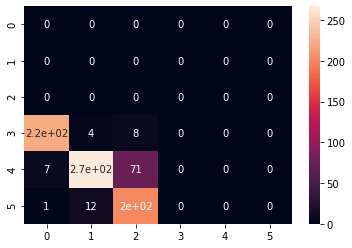

In [39]:
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['trnnormal']
The actual label for this image is:  tstnormal


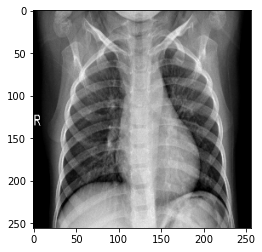

In [42]:
n=500
img = x_test[500]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=feature_extractor.predict(input_img)
predict_SVM = SVM_model.predict(input_img_features)[0] 
predict_SVM = le.inverse_transform([predict_SVM])
print("The prediction for this image is: ", predict_SVM)
print("The actual label for this image is: ", test_labels[n])